In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [ ]:
data = pd.read_csv("/content/Financial_inclusion_dataset.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [ ]:
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
data = data.drop_duplicates()

In [ ]:
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [ ]:
data.isnull().sum()

,0
country,0
year,0
uniqueid,0
bank_account,0
location_type,0
cellphone_access,0
household_size,0
age_of_respondent,0
gender_of_respondent,0
relationship_with_head,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

le = LabelEncoder()

# Dictionary to store mappings of original values to encoded values for each column
value_mappings = {}

# Loop over categorical columns to apply label encoding and store mappings
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
    # Store the mapping of original values to encoded values for the current column
    value_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Now `value_mappings` contains the original-to-encoded mappings for each column
print(value_mappings)


{'country': {'Kenya': 0, 'Rwanda': 1, 'Tanzania': 2, 'Uganda': 3}, 'uniqueid': {'uniqueid_1': 0, 'uniqueid_10': 1, 'uniqueid_100': 2, 'uniqueid_1000': 3, 'uniqueid_1001': 4, 'uniqueid_1002': 5, 'uniqueid_1003': 6, 'uniqueid_1004': 7, 'uniqueid_1005': 8, 'uniqueid_1006': 9, 'uniqueid_1007': 10, 'uniqueid_1008': 11, 'uniqueid_1009': 12, 'uniqueid_101': 13, 'uniqueid_1010': 14, 'uniqueid_1011': 15, 'uniqueid_1012': 16, 'uniqueid_1013': 17, 'uniqueid_1014': 18, 'uniqueid_1015': 19, 'uniqueid_1016': 20, 'uniqueid_1017': 21, 'uniqueid_1018': 22, 'uniqueid_1019': 23, 'uniqueid_102': 24, 'uniqueid_1020': 25, 'uniqueid_1021': 26, 'uniqueid_1022': 27, 'uniqueid_1023': 28, 'uniqueid_1024': 29, 'uniqueid_1025': 30, 'uniqueid_1026': 31, 'uniqueid_1027': 32, 'uniqueid_1028': 33, 'uniqueid_1029': 34, 'uniqueid_103': 35, 'uniqueid_1030': 36, 'uniqueid_1031': 37, 'uniqueid_1032': 38, 'uniqueid_1033': 39, 'uniqueid_1034': 40, 'uniqueid_1035': 41, 'uniqueid_1036': 42, 'uniqueid_1037': 43, 'uniqueid_1038'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   country                 23524 non-null  int64
 1   year                    23524 non-null  int64
 2   uniqueid                23524 non-null  int64
 3   bank_account            23524 non-null  int64
 4   location_type           23524 non-null  int64
 5   cellphone_access        23524 non-null  int64
 6   household_size          23524 non-null  int64
 7   age_of_respondent       23524 non-null  int64
 8   gender_of_respondent    23524 non-null  int64
 9   relationship_with_head  23524 non-null  int64
 10  marital_status          23524 non-null  int64
 11  education_level         23524 non-null  int64
 12  job_type                23524 non-null  int64
dtypes: int64(13)
memory usage: 2.3 MB


In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c9837d59e0dec0a30ce42c21a51fbf6bba4630f422db5cbadad710f0ea4ca001
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport
report=ProfileReport(data,title="EXPRESSO CHURN")
report.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

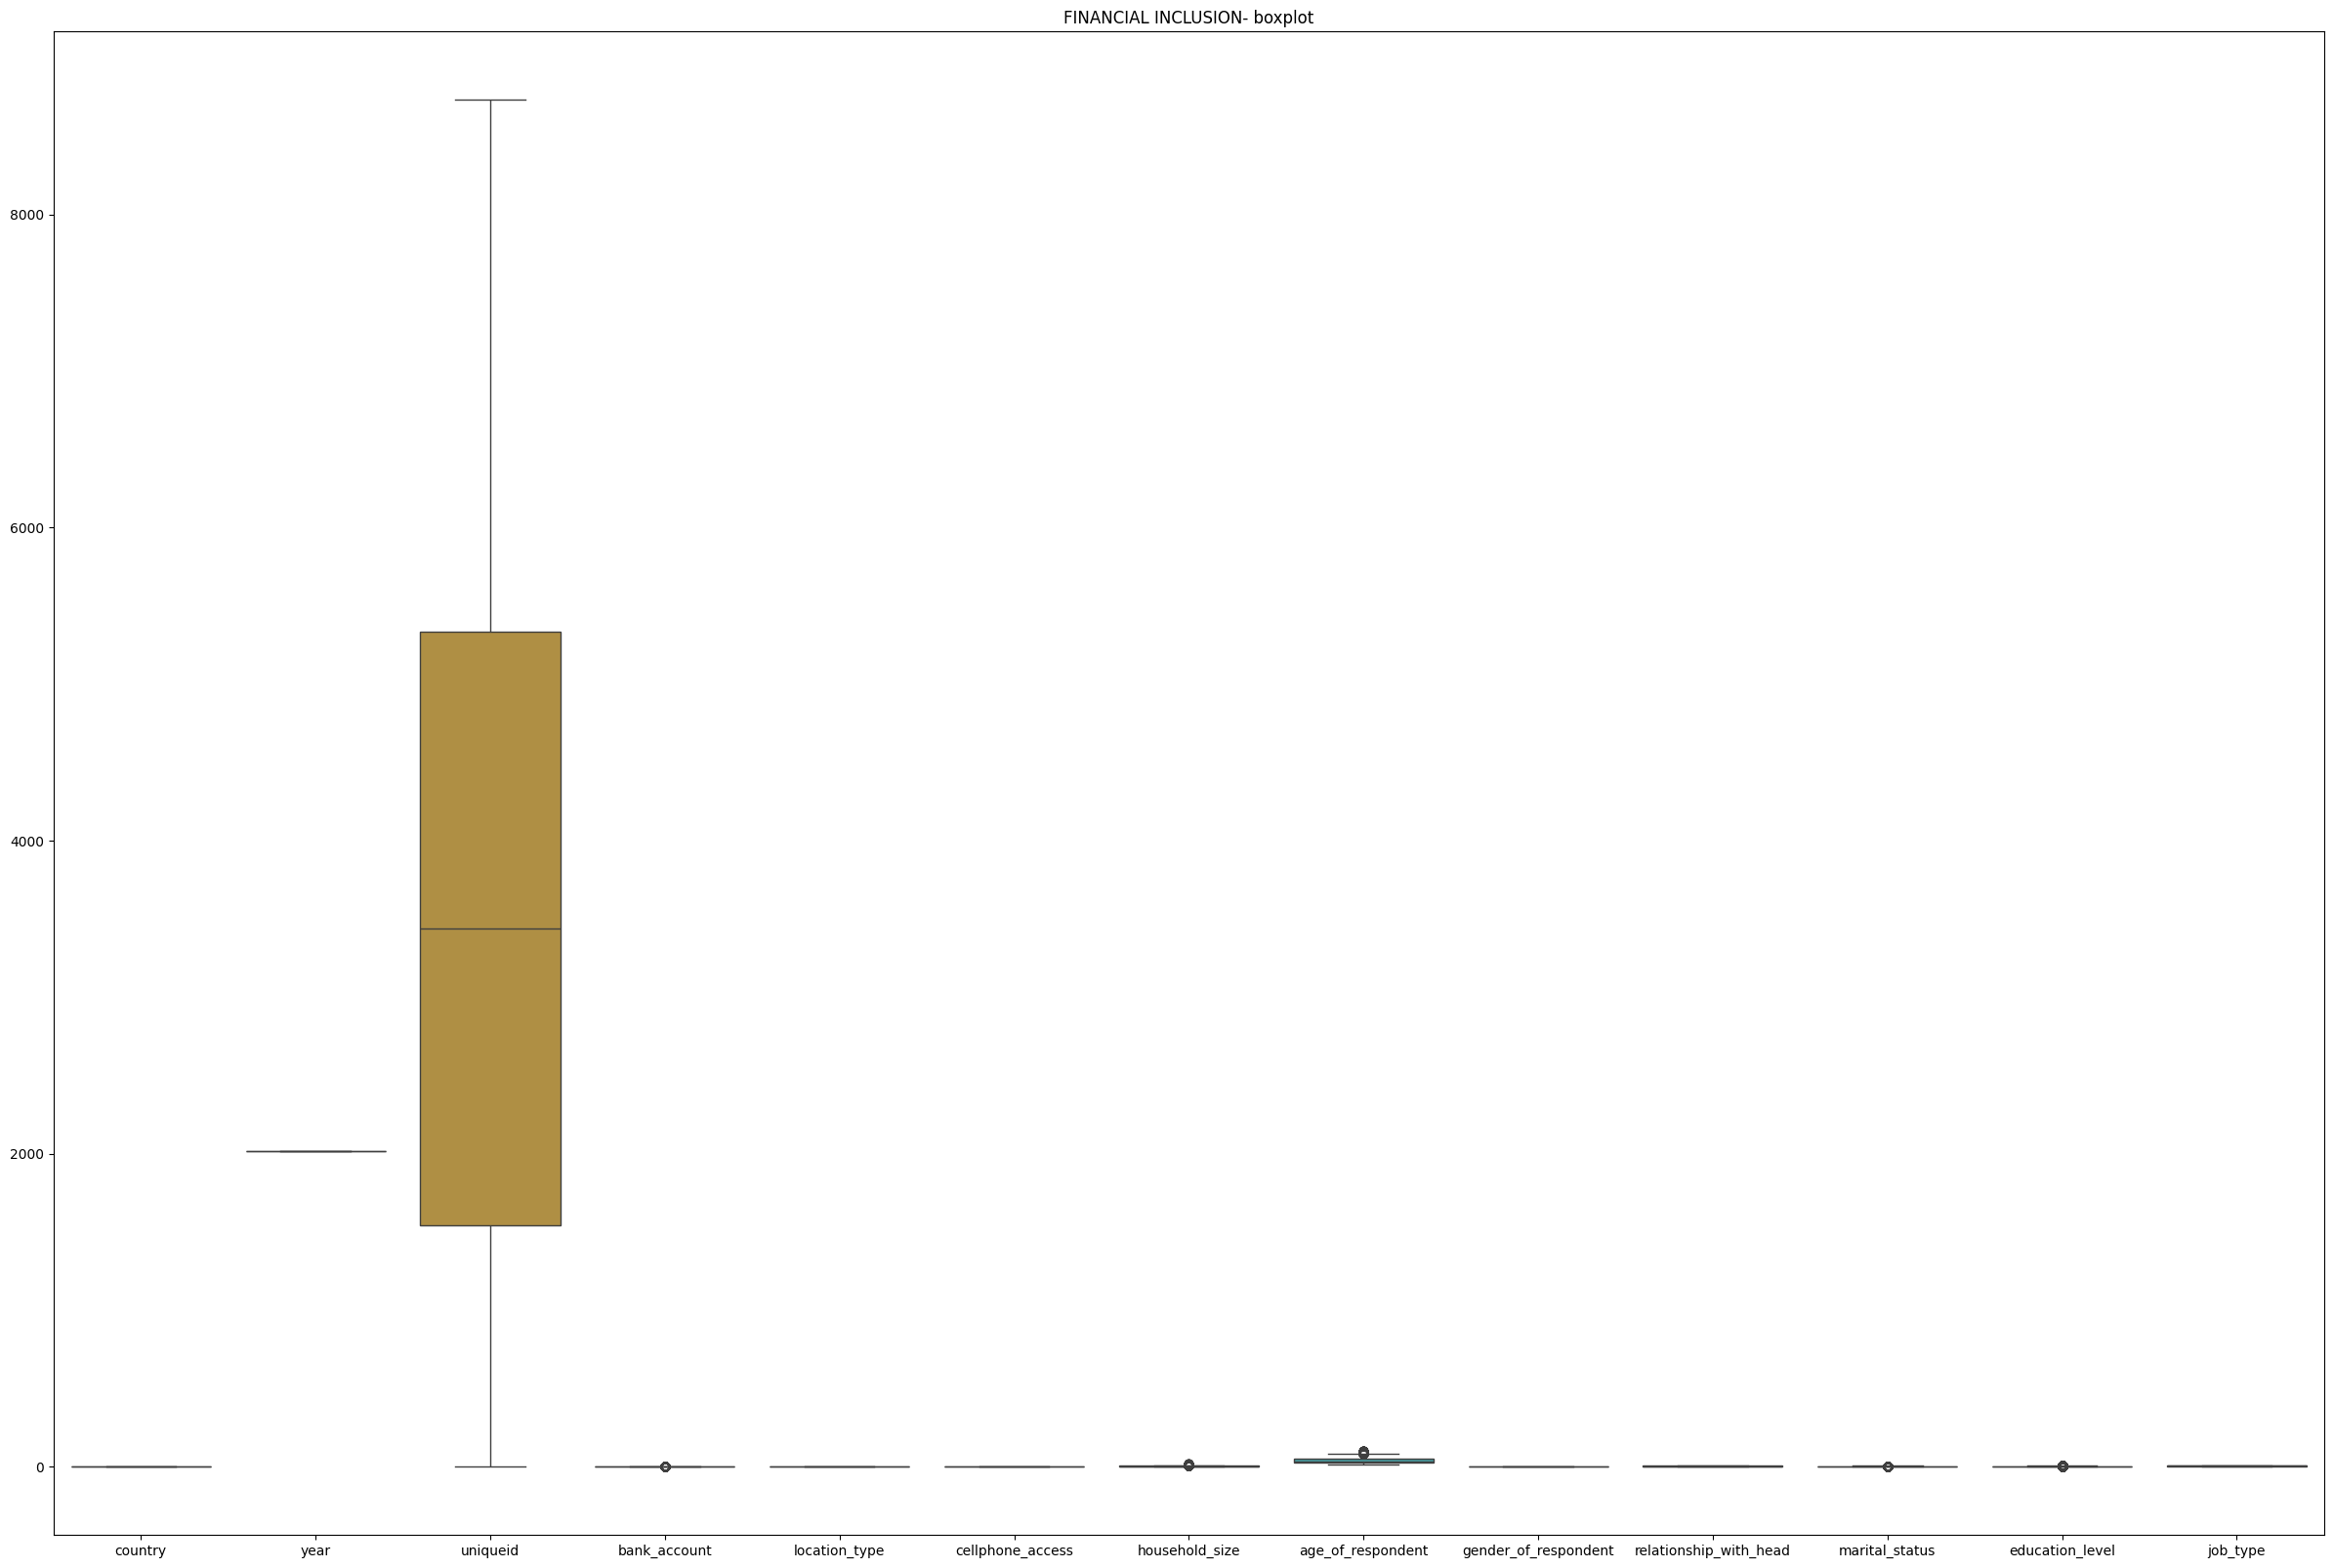

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,20))
sns.boxplot(data=data)
plt.title('FINANCIAL INCLUSION- boxplot')
plt.show()

In [ ]:

data.to_csv('cleaned_financial_inclusion dataset.csv', index=False)